# Evaluating the effect of JPEG compression on images of AgX cubes

The JPEG image format uses a lossy compression in order to reduce file size. This uses a discrete cosine transform and scrambles the high spatial frequency (high resolution) information in the image. This notebook illustrates the loss of information when stored as a JPEG. I first tried this in `ImageJ` but decided it would be easier to do well using `Python` and the `scipy / numpy / scikit-image` stack with this `Jupyter` notebook. The test image was a 300x300 pixel region extracted from qm-02434_XLOK4411-23746 image 12. Although the gray level range was 14 bits on the Gatan camera used to record the image, I scaled the most significant gray levels to fit in the range of 0-255 for this comparison. 

First, import the packages we need.

In [1]:
%matplotlib inline
import os
from PIL import Image as pil
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread, imsave
from jmToolsPy3 import plotImage
qual = 85

# Load and display the original image

We will use the helper function from `jmToolsPy3` to display the image with a colorbar by wrapping the functions called from `matplotlib`.

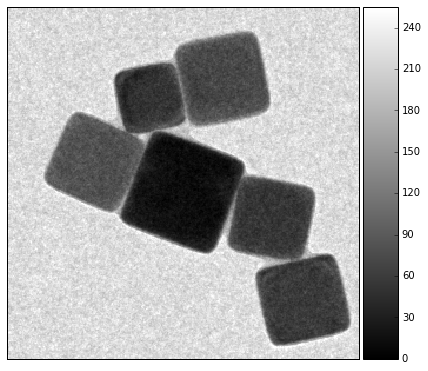

In [2]:
ori = imread('./agx-cubes-TEM.tif')
plotImage(ori, cmap='gray', figsize=(7,7), cb=True, bare=True, interpolation='nearest');

# Save the image as a JPEG

We'll write a JPEG image using a typical `quality` factor, reload the image and display it. 

(300, 300) uint8


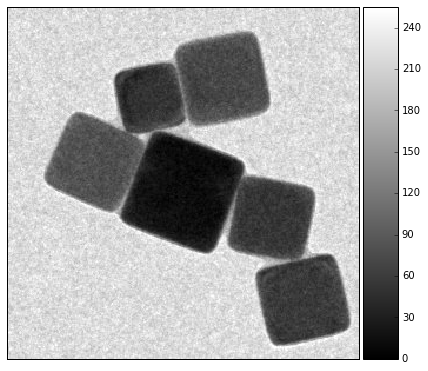

In [3]:
jpgPth = './gr.jpg'
pim = pil.fromarray(np.uint8(ori))
pim.save(jpgPth, "JPEG", quality=qual)

jpg = imread(jpgPth)
print(jpg.shape, jpg.dtype)
plotImage(jpg, cmap='gray', figsize=(7,7), cb=True, bare=True, interpolation='nearest');

# Compute and display the difference image

We will compute the gray level difference image as a float and display using the `viridis` colormap. 

Gray level difference - Min:  0.0 , Max: 20.0


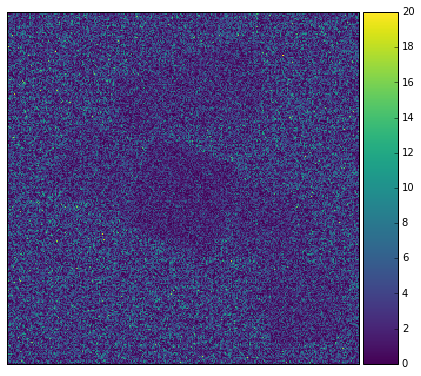

In [4]:
ori = ori.astype(float)
jpg = jpg.astype(float)
dif = np.abs(ori - jpg)

minV = np.min(dif)
maxV = np.max(dif)

print("Gray level difference - Min: ", minV, ", Max:", maxV)

plotImage(dif, cmap='viridis', figsize=(7,7), cb=True, bare=True, interpolation='nearest');

Note the differences around the grain edges. This could effect size and shape parameters.